In [33]:
import umap
import sklearn
import pandas as pd
from openTSNE import TSNE
import matplotlib.pyplot as plt
from main import *


def mean(x, size):
    cutoff = len(x) % size
    if cutoff == 0:
        cutoff = -len(x)
    print(len(x), size, cutoff)
    return x[:-cutoff].reshape((-1, size)).mean(axis=1)

In [34]:
# only get 10 lines per algorithm (0-x, 1-x, 2-x, 3-x)
df = pd.read_csv("trace10.csv")
df = df[df["line"].str.endswith("-0")]
df.to_csv("trace1.csv", index=False)
df = pd.read_csv("trace1.csv") # performs re-indexing

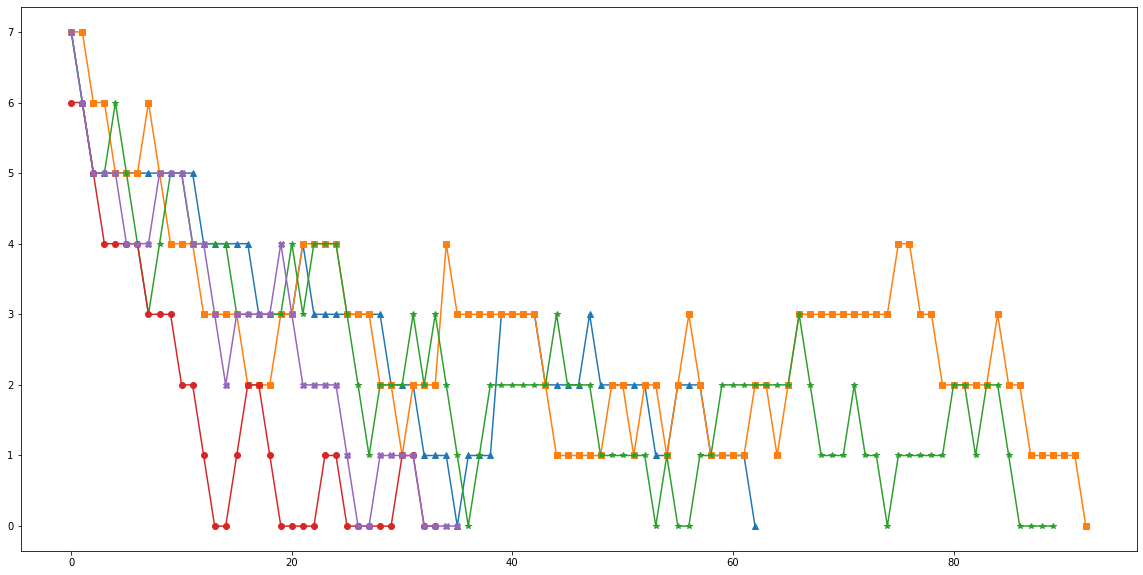

In [35]:
plt.figure(figsize=(20, 10))
xy = df[["step", "zeros"]].to_numpy()
lines = [g[1] for g in df.groupby("line", group_keys=False)]
for line in lines:
    x,y = xy[line.index].T
    plt.plot(x, y, marker=MARKERS[line["algo"].iloc[0]])

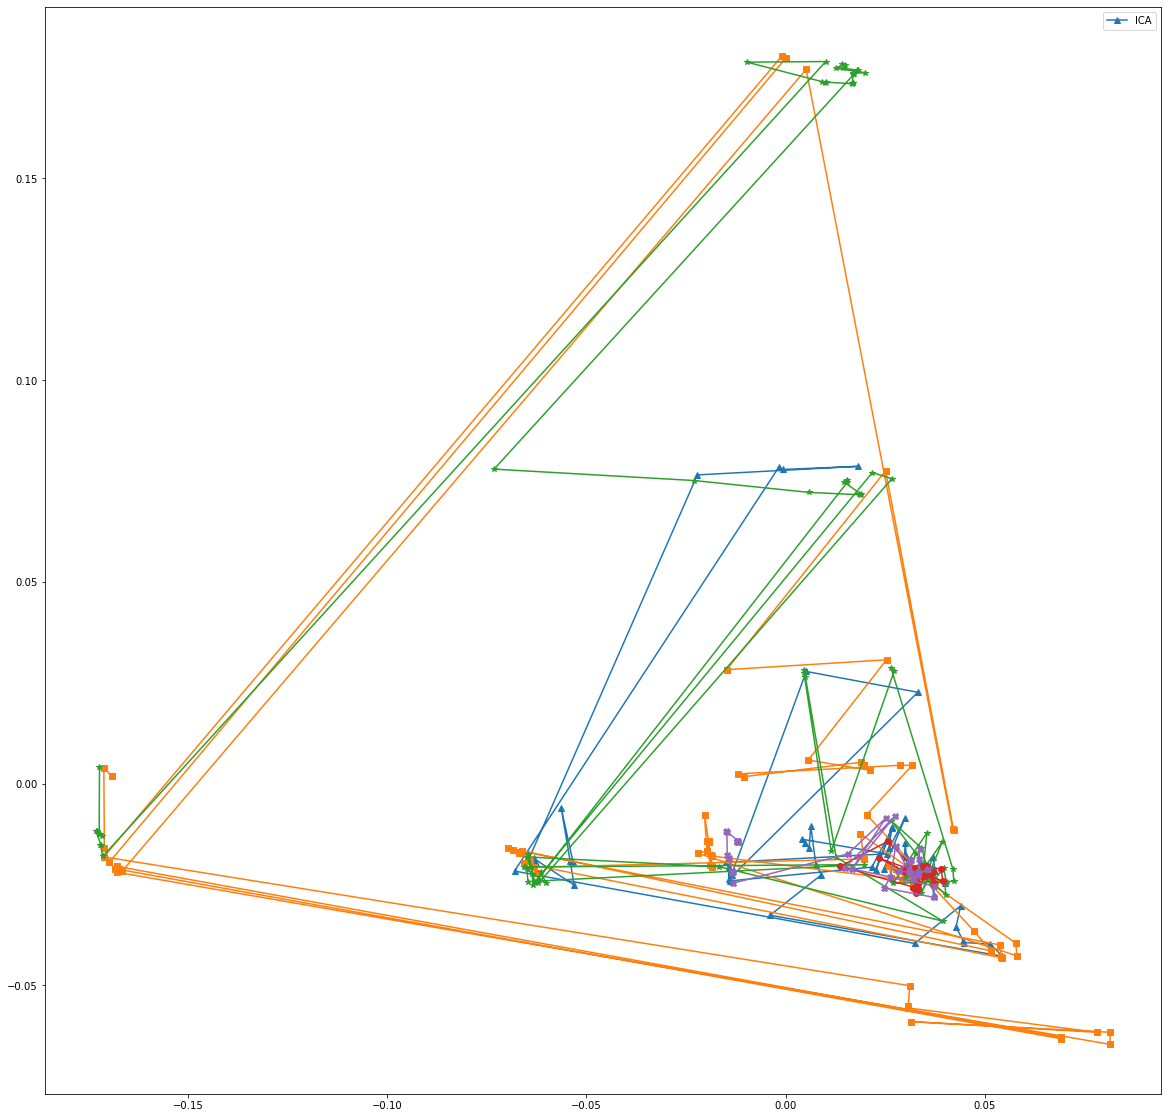

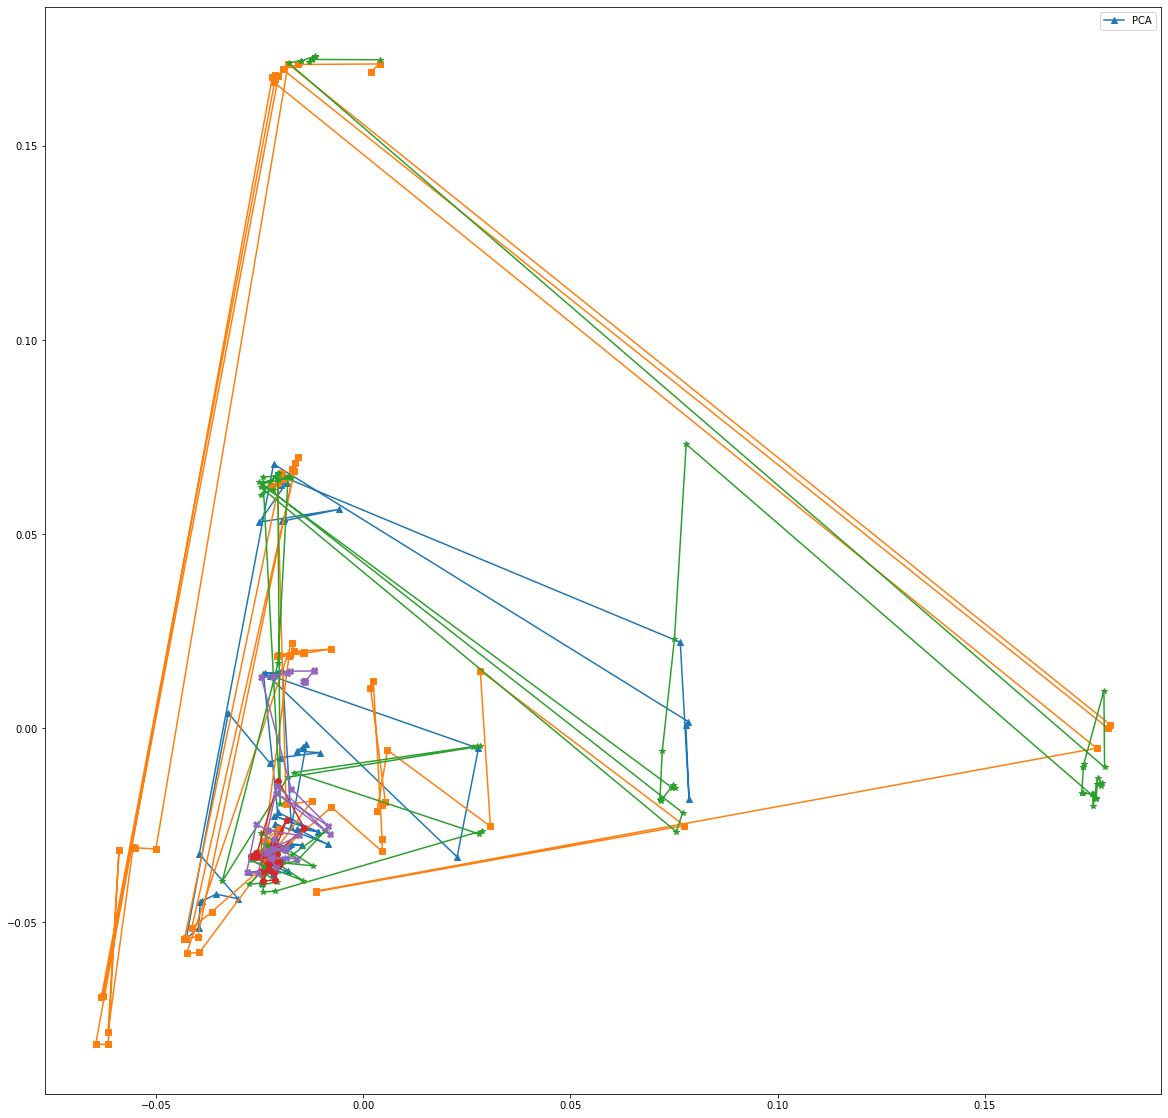

/usr/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:482: RuntimeWarning: divide by zero encountered in true_divide
  K = (u / d).T[:n_components]  # see (6.33) p.140
/usr/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:482: RuntimeWarning: invalid value encountered in true_divide
  K = (u / d).T[:n_components]  # see (6.33) p.140


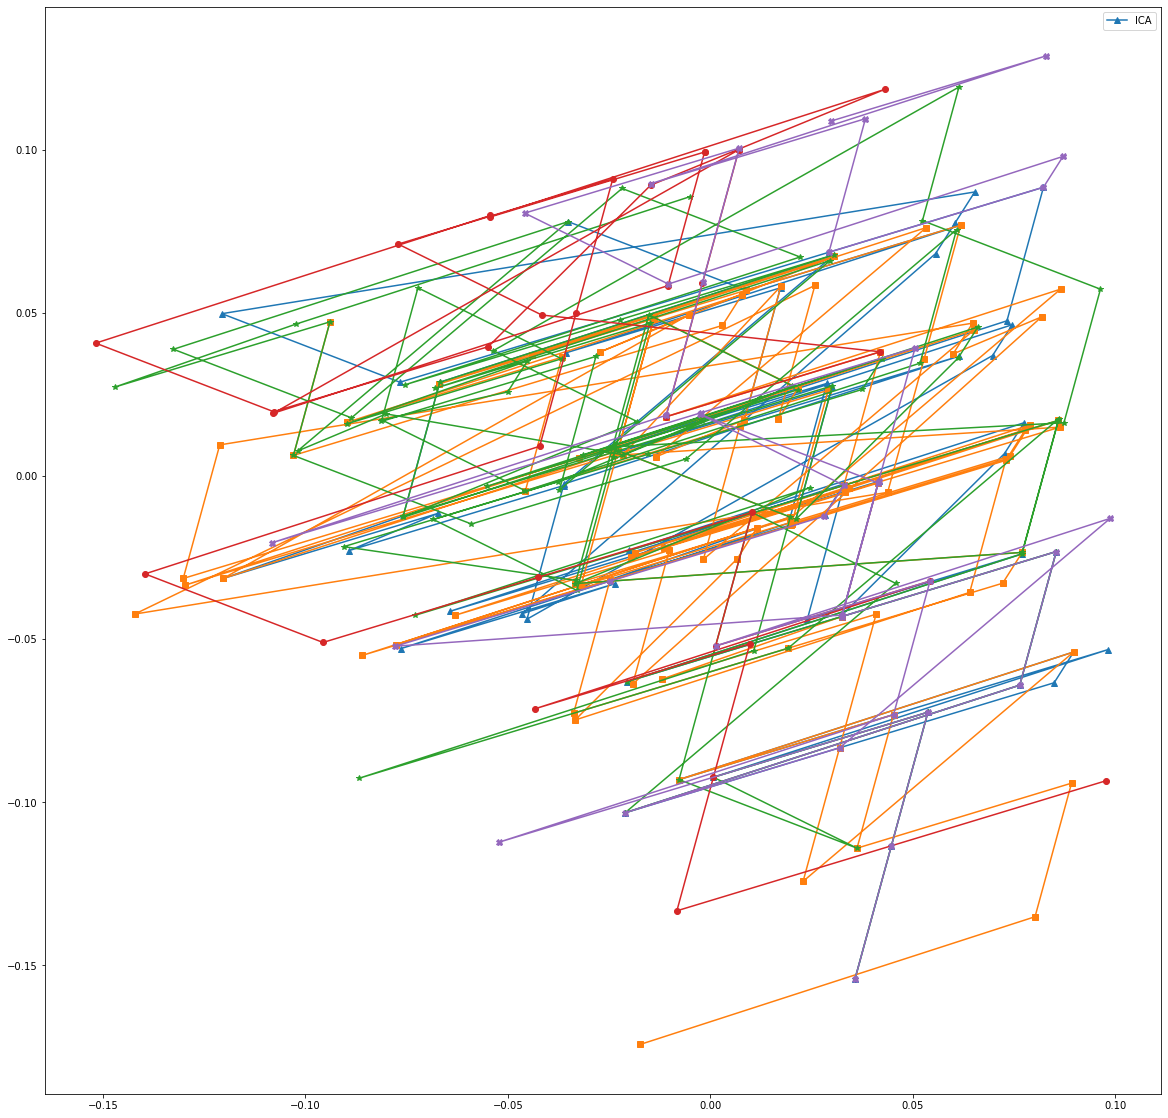

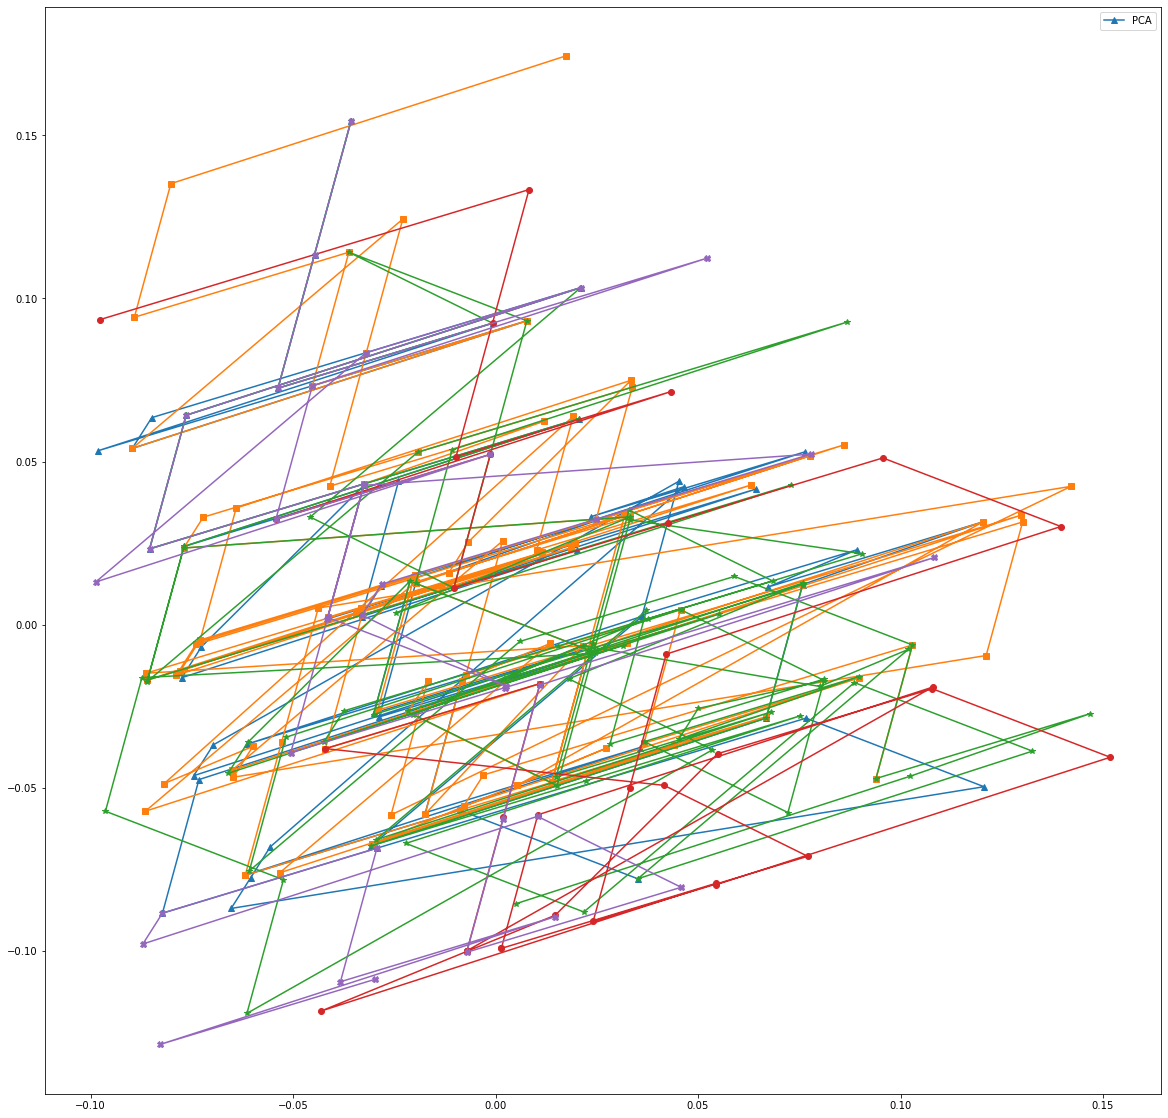

In [38]:

TSNE_METRICS = ['euclidean', 'manhattan', 'chebyshev','minkowski','hamming', 'canberra', 'braycurtis']
UMAP_METRICS = ["euclidean","manhattan","chebyshev","minkowski","canberra","braycurtis","mahalanobis","wminkowski","cosine","correlation","hamming","jaccard","dice","kulsinski","ll_dirichlet","hellinger","rogerstanimoto","sokalmichener","sokalsneath","yule"]

def plot_lines(xy, label):
    plt.figure(figsize=(20, 20))
    for line in lines:
        x,y = xy[line.index].T
        marker = MARKERS[line["algo"].iloc[0]]
        plt.plot(x, y, marker=marker)
        plt.legend([label])
    plt.show()

df = pd.read_csv("trace1.csv")
lines = [g[1] for g in df.groupby("line", group_keys=False)]
for DATA in [FIELD_, BIN_]: #
    # for metric in TSNE_METRICS:
        # for metric in UMAP_METRICS:
    if DATA == FIELD_:
        xy = np.log2(df[FIELD_].to_numpy()+1)
    xy = df[DATA].to_numpy()
    #for perplexity in range(50, 150, 20):
    #    for n_neighbors in range(2, 12, 2):
    # xy = TSNE(metric=metric).fit(xy)
    # xy = umap.UMAP(metric=metric).fit_transform(xy)
    xy = sklearn.decomposition.FastICA(n_components=2).fit_transform(xy)
    plot_lines(xy, "ICA")
    xy = sklearn.decomposition.PCA(n_components=2).fit_transform(xy)
    plot_lines(xy, "PCA")
    # xy = umap.UMAP().fit_transform(X=xy)
    # plot_lines(xy)